<a href="https://colab.research.google.com/github/marcelozanchetta/EDS104/blob/main/Lab7_Atividade_Dados_Exploratorios_Agrupamento_Densidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratório 7 - Atividade 1**




Essa atividade explora algoritmo de agrupamento baseado em densidade dos datasets com a Linguagem Python. **Essa atividade será desenvolvida em grupo com  três estudantes.**

* O algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) analisa grupos definidos como regiões com alta densidade dos objetos, separados de regiões de baixa densidade.
* Esse algoritmo não precisa informar previamente o número de grupos.
* Usa os parâmetros: objeto central, objeto de borda e ruído.

Nessa atividade vamos explorar o algoritmo DBSCAN para investigação do conjunto de dados.

Referência para exemplificar o uso do algoritmo: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

# **Algoritmo DBSCAN**


* No DBSCAN, os pontos de dados são classificados em três tipos: pontos centrais, pontos de borda e pontos de ruído, com base na densidade de sua vizinhança local.
* A densidade da vizinhança local é definida de acordo com dois parâmetros: raio do tamanho da vizinhança (Eps) e número mínimo de pontos na vizinhança (min_amostras).

Para essa abordagem, usaremos um conjunto de dados bidimensional e ruidoso criado originalmente por Karypis et al. [1] para avaliar um algoritmo proposto por eles. O dataset foi inserido no link do github (https://github.com/marcelozanchetta/EDS104). O código de exemplo mostrado aqui carregará e plota a distribuição dos dados as quais estão contidas no Google Drive.

<Axes: xlabel='x', ylabel='y'>

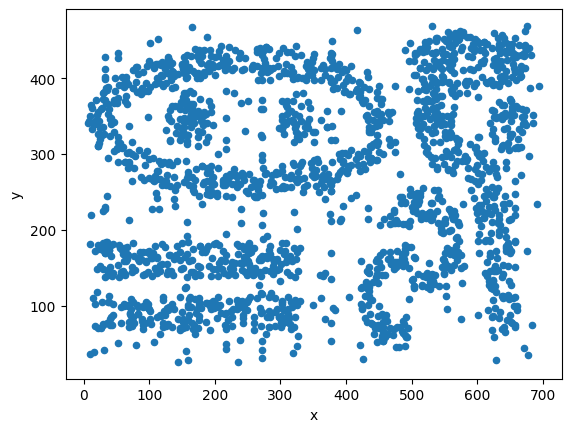

In [1]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Dados_Exploratorios_dataset-cvs/datasets/chameleon.data', delimiter=' ', names=['x','y'])
data.plot.scatter(x='x',y='y')

In [2]:
from sklearn.cluster import DBSCAN
import numpy as np

# executa o algoritmo DBSCAN com os parâmetros eps e min para dados
# esses parâmetros podem ser ajustados para agrupamento dos dados
db = DBSCAN(eps=15.5, min_samples=3).fit(data)

# cria um vetor com o conjunto de dados e imprimir seus rótulos do db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

# atribui o valor true às posições no array correspondentes aos índices dos pontos centrais encontrados
core_samples_mask[db.core_sample_indices_] = True

In [3]:
# converte para o DataFrame os rótulos e imprime na tela
labels_df = pd.DataFrame(db.labels_,columns=['Cluster_ID'])
print(labels_df['Cluster_ID'])

0       0
1       1
2       2
3       3
4       4
       ..
1966    0
1967    4
1968    4
1969    0
1970    4
Name: Cluster_ID, Length: 1971, dtype: int64


In [4]:
# contagem do número de grupos (rótulos) encontrados e pontos atribuidos
labels_df.Cluster_ID.value_counts().to_frame()

,count
Cluster_ID,
4,566
0,451
1,438
2,128
3,109
-1,82
8,72
7,55
5,42


Nesses dados podemos observar que há 15 agrupamentos e 1 outlier (-1). O agrupamento `4` apresentou o maior número de pontos 566.

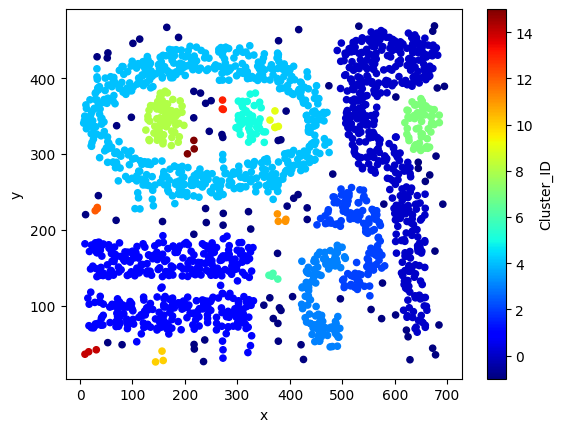

In [5]:
result = pd.concat((data,labels_df), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster_ID', colormap='jet')
labels_df.loc[:,'Cluster_ID'] = db.labels_

**Referência:**

[1] https://www-users.cse.umn.edu/~hanxx023/dmclass/chameleon.pdf

---
# **Exercicios**
---

#**Conjunto de Dados de Vinho**

Esses dados são os resultados de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de três cultivares diferentes. A análise determinou as quantidades de 13 atributos encontrados em cada um dos três tipos de vinhos.

Os atributos são os seguintes (indicados por Riccardo Leardi):

* Álcool
* Ácido málico
* Cinza
* Alcalinidade das cinzas
* Magnésio
* Fenóis totais
* Flavanóides
* Fenóis não flavanóides
* Proantocianinas
* Intensidade da cor
* Cor
* OD280/OD315 de vinhos diluídos
* Prolina

Referência do Dataset: https://www.openml.org/search?type=data&status=active&id=43571


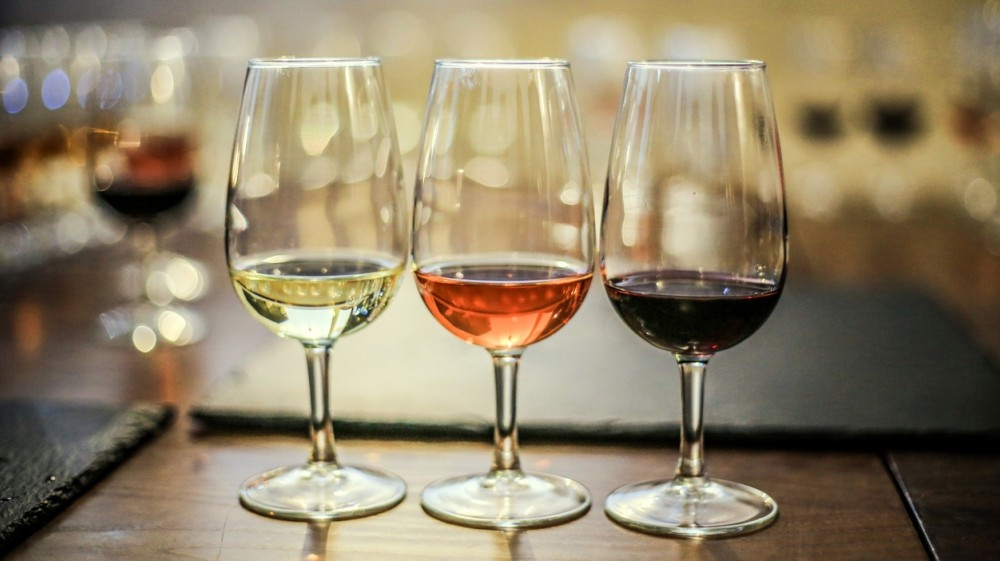


Fonte: https://www.embedded-robotics.com/wine-dataset-binary-classification/

1. Baixe o conjunto de dados dados de propriedades de vinhos do site https://www.openml.org/search?type=data&status=active&id=43571.

2. Verifique as correlações entre atributos e elimine os atributos dependentes. Para medir a dependência entre os atributos calcule a matriz de correlação e quando dois atributos tiver um alto valor,  isso pode indicar uma dependência entre eles. Escolha os quatro melhores características para avaliação do algoritmo. Faça a normalização dos atributos independentes escolhidos.

3. Faça a implementação do algoritmo DBSCAN e avalie o comportamento dos dados. Use o biblioteca sklearn.cluster para trabalhar com esse algoritmo. Escolha os valores de Eps (eps) e número mínimo de amostras (min_samples).

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

 4. Use o código para avaliar os diferentes valores de Eps e Min_Samples. O parâmetro y_dbscan representa o rótulo atribuido pelo algoritmo e o X representa o dataset.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Define os valores de eps e min_samples a serem testados
eps_values = [0.1, 0.5, 1.0, 1.5, 2.0]
min_samples_values = [2, 3, 4, 5]

# Cria uma figura com subplots
fig, axs = plt.subplots(len(eps_values), len(min_samples_values), figsize=(20, 20))

# Para cada combinação de eps e min_samples plota o resultado baseado no algoritmo DBSCAN
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        y_dbscan = dbscan.fit_predict(X)
        n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)  # calcula o número de clusters
        # Apenas irá protar se mais que um cluster for encontrado
        if n_clusters > 1:
           axs[i, j].scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis')
            axs[i, j].set_title(f'eps={eps}, min_samples={min_samples}')
        else:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

5. Avalie os diversos parâmetros e descreva o que de forma visual representa melhor agrupamento entre os grupos de vinhos investigados para os parâmetros analisados. Informe sobre o número estimado de clusters e valores de Eps e min_samples.

6. Implemente a métrica para comparação entre os resultados obtidos e o padrão ouro (rótulos definidos na base). Qual o valor obtido de acurácia para essa comparação?

*  A métrica acurácia é dada por:

*   $\texttt{Acurácia}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)$



In [ ]:
# Calcula a acurácia para os rótulos entre o padrão ouro e encontrados pelo algoritmo
# y_DBSCAN - valor obtido pelo método DBSCAN (rótulos)
# y_true - rótulos definidos na base investigada (padrão ouro)

from sklearn.metrics import accuracy_score

if np.unique(y_DBSCAN).size > 1:
    accuracy = accuracy_score(y_true, y_dbscan)
    print(f'Acurácia: {accuracy:.2f}')
else:
    print('Apenas um cluster')

7. Vamos agora acrescentar ruídos sobre os dados. Crie um conjunto de dados com a presença de ruídos sobre as colunas dos atributos. Escolha um dos atributos que tem maior independência para aplicar o ruído. Avalie o desempenho do método DBSCAN com o banco de dados ruidoso.